In [2144]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import nbformat
import numpy as np
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2145]:
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains 1338 rows and 7 columns. Each row contains data about one customer each. 
We have to find the value of the charges columns using the data in the other columns.

In [2146]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are no null values in any of the columns

In [2147]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2148]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

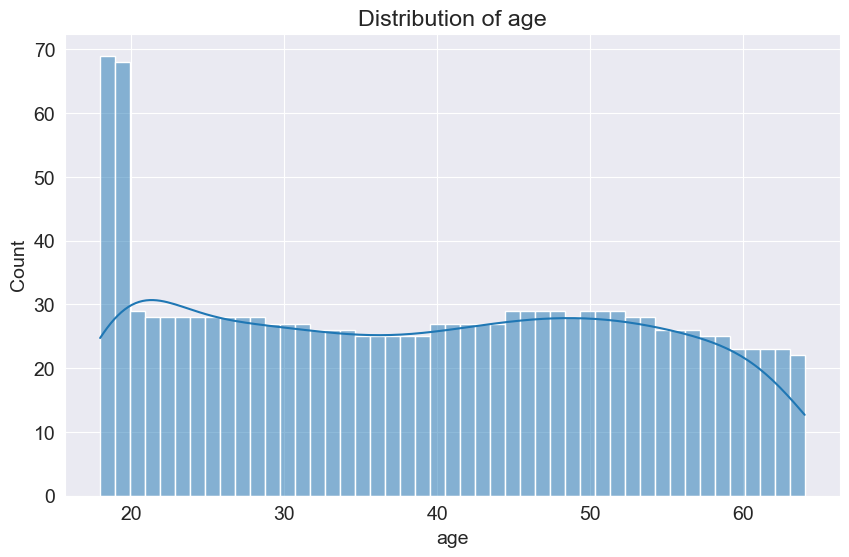

In [2149]:
sns.histplot(data=medical_df, 
             x='age', 
             bins=47, 
             kde=True)
plt.title('Distribution of age')
plt.show()

In [2150]:
medical_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

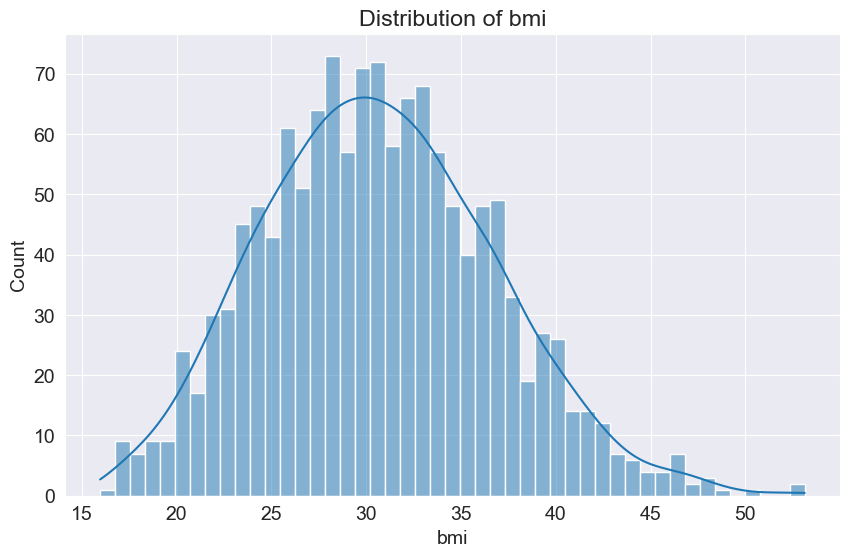

In [2151]:
sns.histplot(data=medical_df, 
             x='bmi', 
             bins=47, 
             kde=True)
plt.title('Distribution of bmi')
plt.show()

In [2152]:
medical_df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

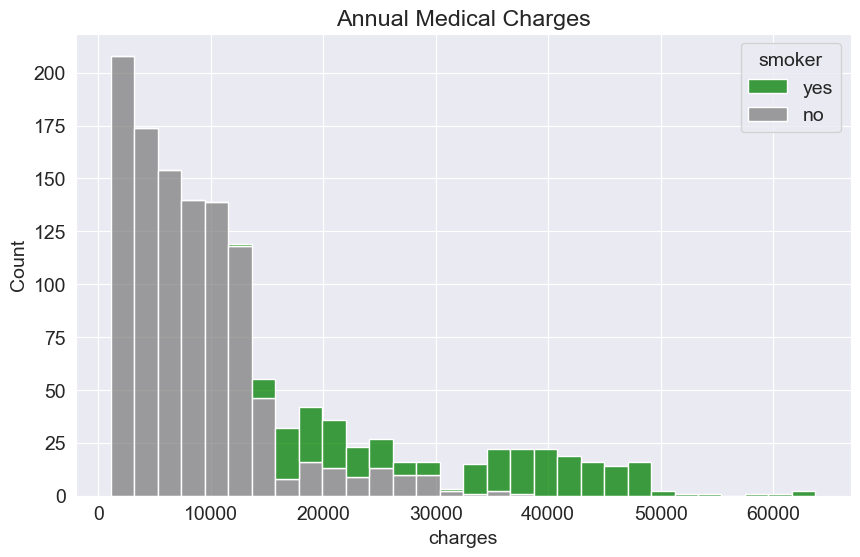

In [2153]:
fig, ax = plt.subplots()
sns.histplot(data = medical_df,
             x = 'charges',
             hue = 'smoker',
             multiple = 'stack',
             palette = ['green','grey'],
             ax = ax)

ax.set_title('Annual Medical Charges')
plt.show()

In [2154]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

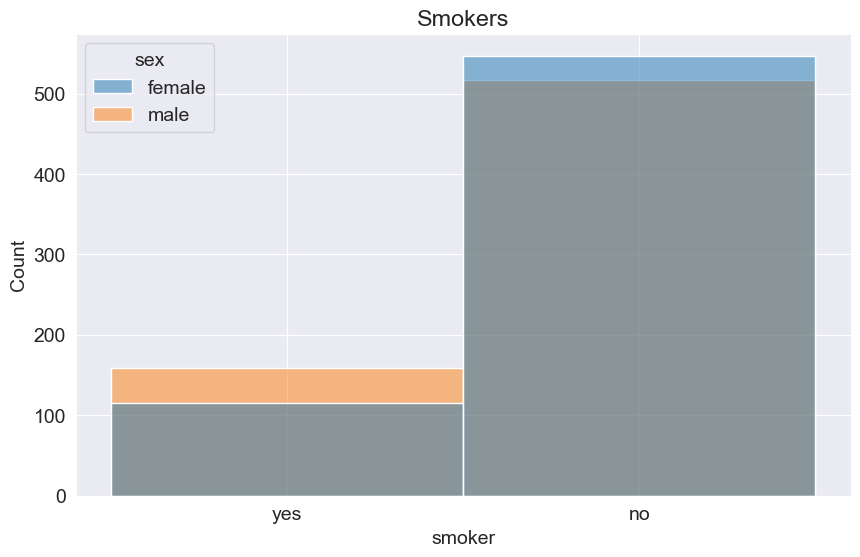

In [2155]:
sns.histplot(data = medical_df,
             x = 'smoker',
             hue = 'sex',)

plt.title('Smokers')
plt.show()

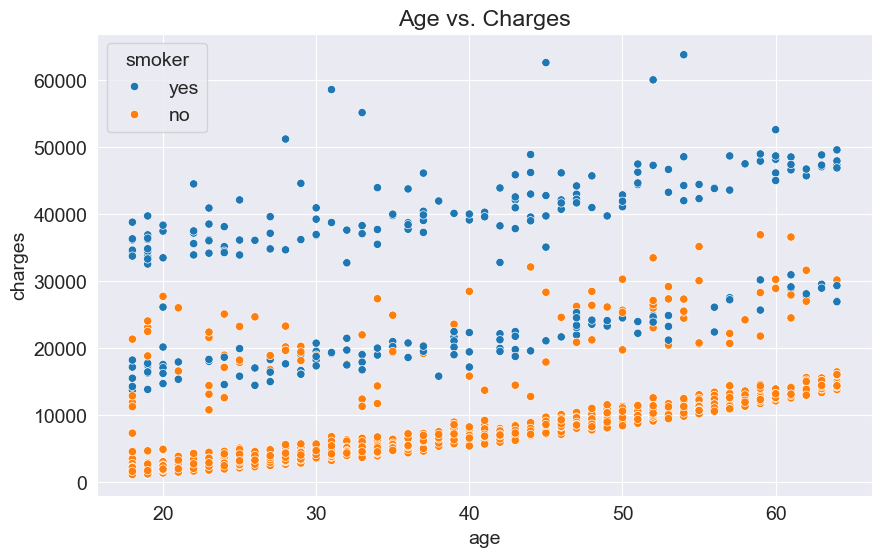

In [2156]:
sns.scatterplot(data=medical_df,
                x = 'age',
                y = 'charges',
                hue = 'smoker')
plt.title('Age vs. Charges')
plt.show()

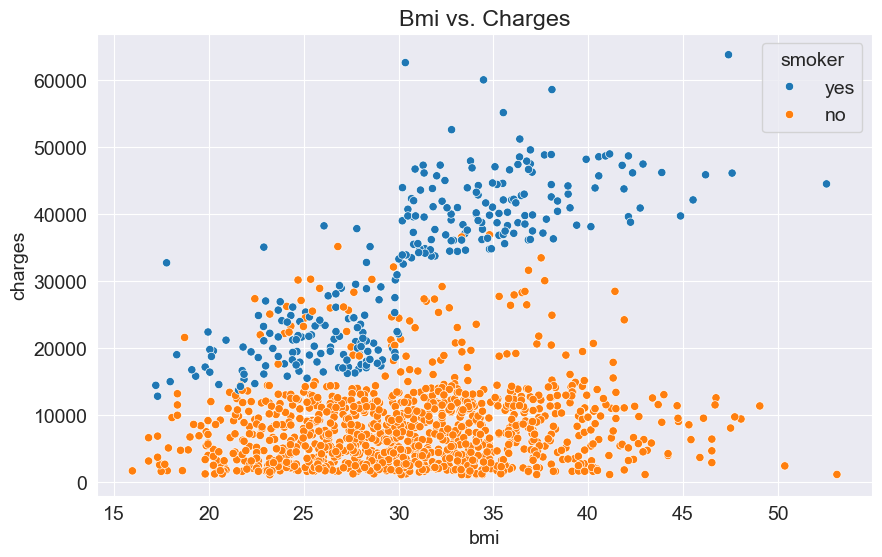

In [2157]:
sns.scatterplot(data=medical_df,
                x = 'bmi',
                y = 'charges',
                hue = 'smoker')
plt.title('Bmi vs. Charges')
plt.show()

Correlation Coefficients
1. charges with age grow together
2. charges with bmi do not grow together

In [2158]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [2159]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

Computing the correlation coefficient with categorical columns, they must be converted to numerical values.
We can use dictionary for that.
The greater the value of correlation coefficient, the stronger the relationship.

In [2160]:
smoker_values = {
  'no': 0,
  'yes': 1
}

medical_df['smoker_numeric'] = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(medical_df.smoker_numeric)

0.7872514304984778

Below is the correlation of all columns with other columns

In [2161]:
medical_df = medical_df.select_dtypes(include=[np.number])
medical_df.corr()

,age,bmi,children,charges,smoker_numeric
age,1.000000,0.109272,0.042469,0.299008,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.787251
smoker_numeric,-0.025019,0.003750,0.007673,0.787251,1.000000


Below is the correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

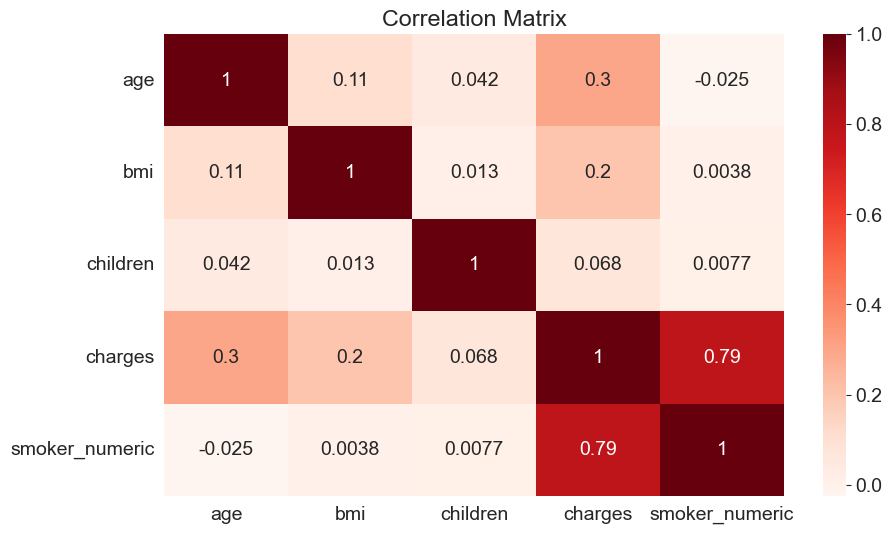

In [2162]:
sns.heatmap(medical_df.corr(),
            cmap = 'Reds',
            annot = True)
plt.title('Correlation Matrix')

According to above heatmap, smoker and age has the strongest correlation with charges, lets try to find the a way of estimating the value of charges using the value of age for non-smokers

In [2163]:
non_smoker_df = medical_df[medical_df.smoker_numeric == 0] #dataframe for non-smokers

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

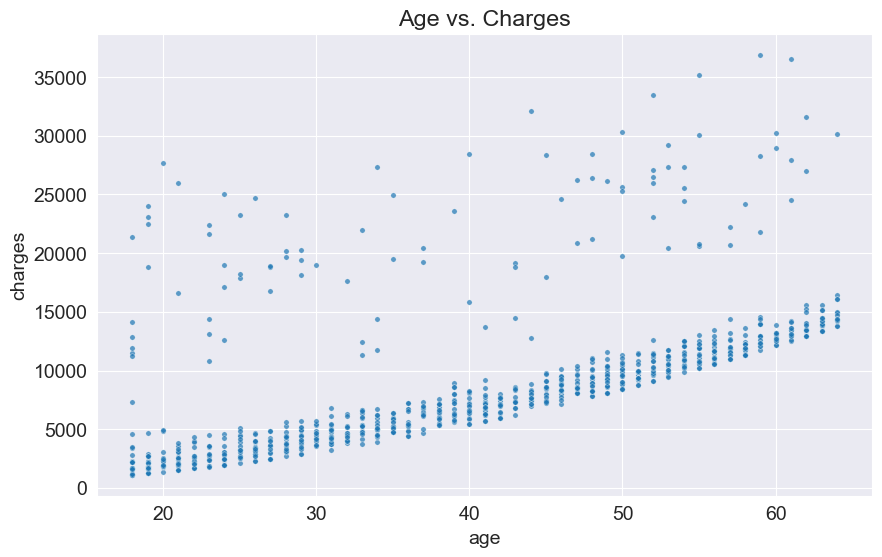

In [2164]:
plt.title('Age vs. Charges')
sns.scatterplot(data = non_smoker_df,
                x = 'age',
                y = 'charges',
                alpha = 0.7,
                s = 15)

Above points seem to form a line, we will try to create a line to predict the charges. A line on the x & y coordinate can be formed by y = wx + b
w = slope
b = intercept
We will define a function estimate_charges

In [2165]:
def estimate_charges(age, w, b):
  return w * age + b

Text(0, 0.5, 'Estimated Charges')

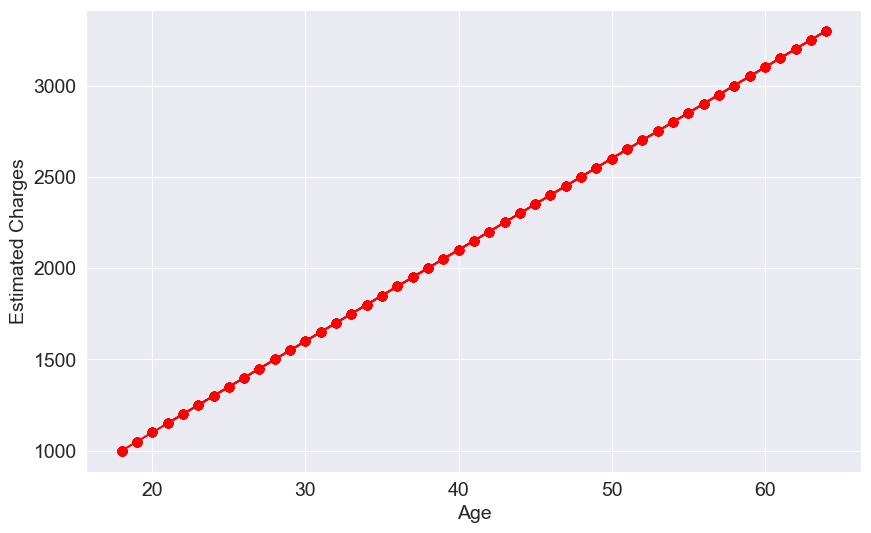

In [2166]:
w = 50
b = 100
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

#this is the line for the sample data

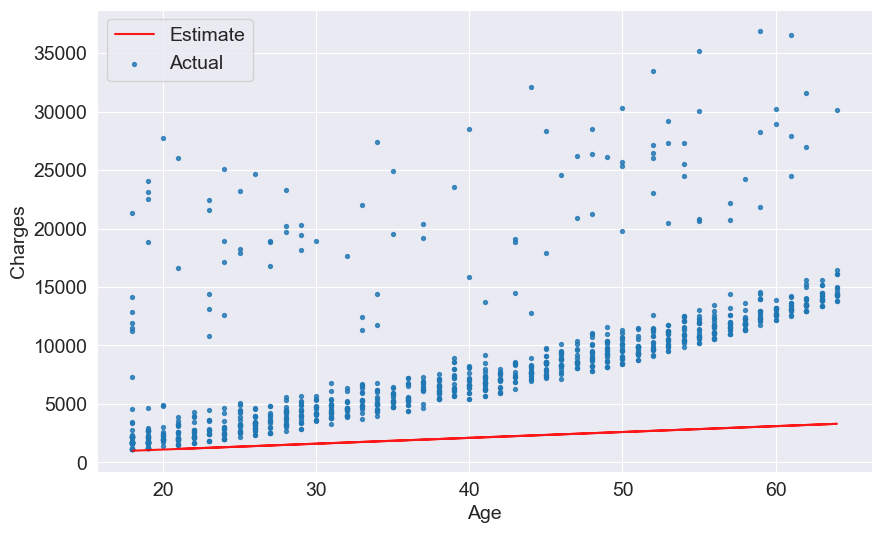

In [2167]:
#overlaying the line on the actual data
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

Above graph shows that are estimates are clearly very poor, we will try this with different parameters. For that we will define a function try_parameters

In [2168]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate','Actual'])

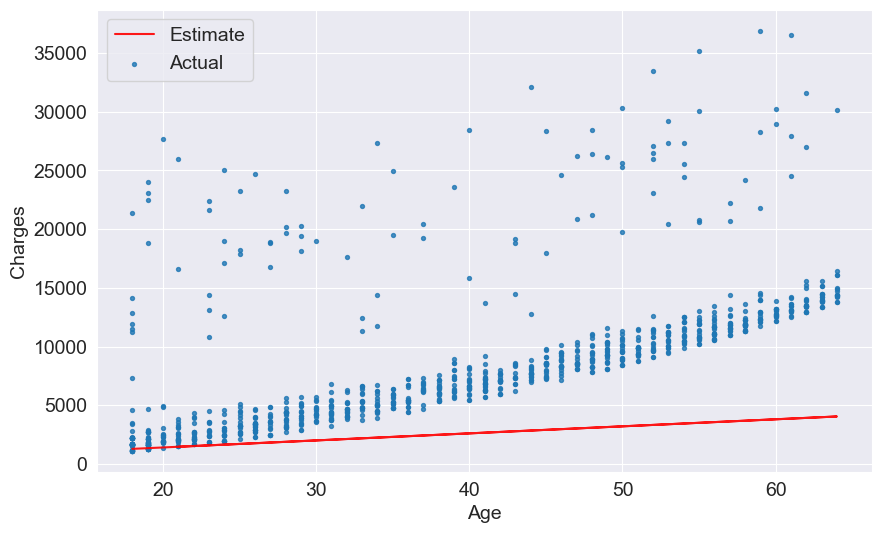

In [2169]:
try_parameters(60, 200)

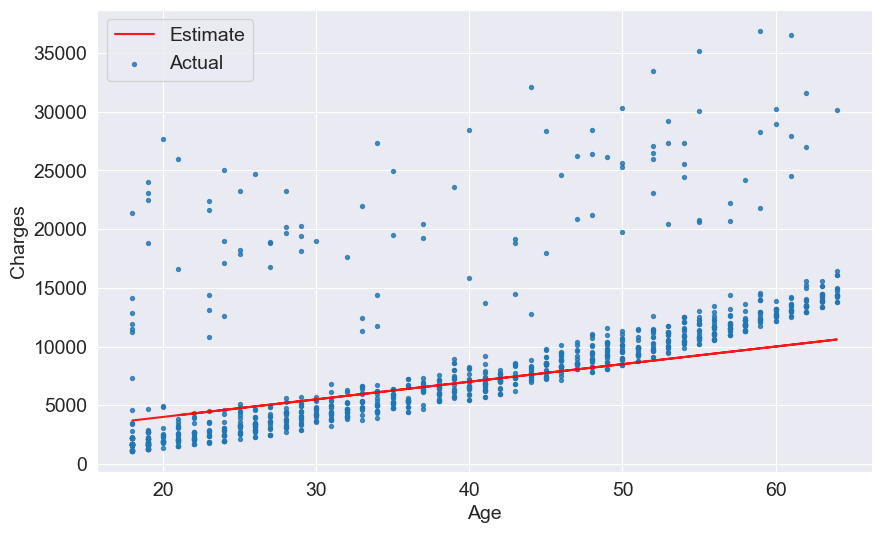

In [2170]:
try_parameters(150, 1000)

Predicting error using Root Mean Square Error (RMSE), we will predict RMSE with random sample set of weights
RMSE = sqrt(sum((predicted-actual)**2)/N) where N is number of points

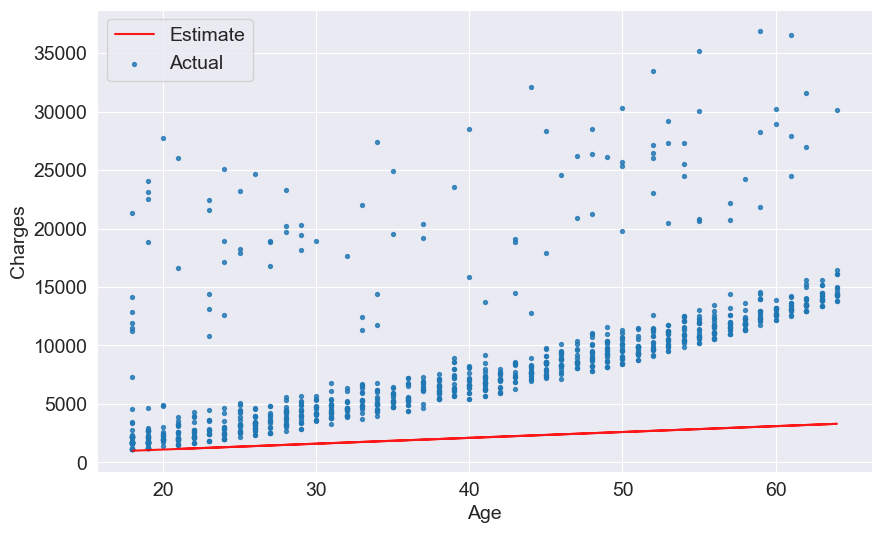

In [2171]:
def rmse(target, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

w = 50
s = 100

try_parameters(w, b)


In [2172]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

rmse(targets, predicted)

8461.949562575493

Modifying try_parametes function to add RMSE loss

In [2173]:
def try_parameters2(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate','Actual'])

  loss = rmse(target, predictions)
  print('RMSE loss:', loss)

RMSE loss: 6625.211784547988


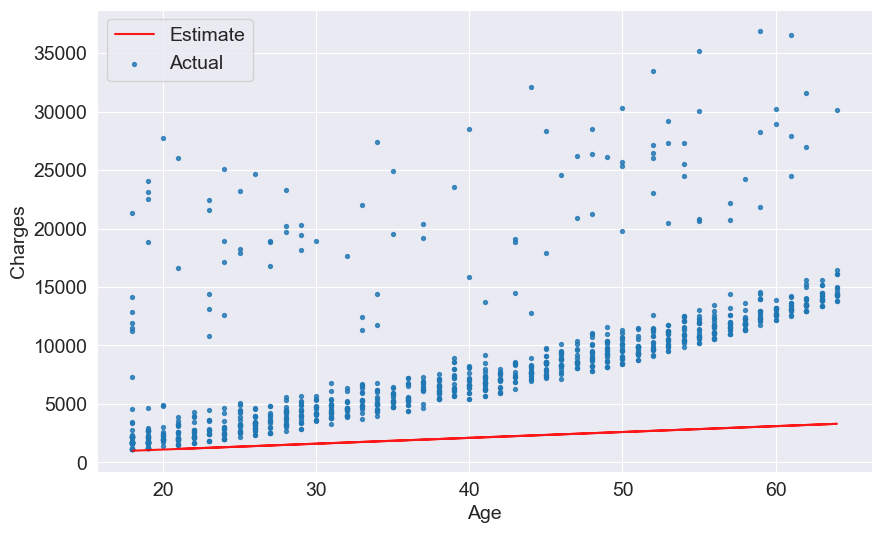

In [2174]:
try_parameters2(100,420)

Linear Regression using sci-kit learn

In [2175]:
from sklearn.linear_model import LinearRegression

#create a new model project
model = LinearRegression()

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

inputs.shape

(1064, 1)

In [2176]:
targets.shape

(1064,)

In [2177]:
#fitting the model to data
model.fit(inputs, targets)

LinearRegression()

In [2178]:
#we can prdeict the charges on some data
model.predict(np.array([[25],
                        [40],
                        [59]]))

c:\Users\tusha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4589.80226421,  8598.53595668, 13676.26530048])

Above values can be checked with plot that we created above and its pretty accurate when we compare them

In [2179]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [2180]:
#lets compute the RMSE loss to evaluate the model
rmse(targets, predictions)

4662.505766636395

In [2181]:
#w
model.coef_

array([267.24891283])

In [2182]:
#b
model.intercept_

-2091.4205565650864

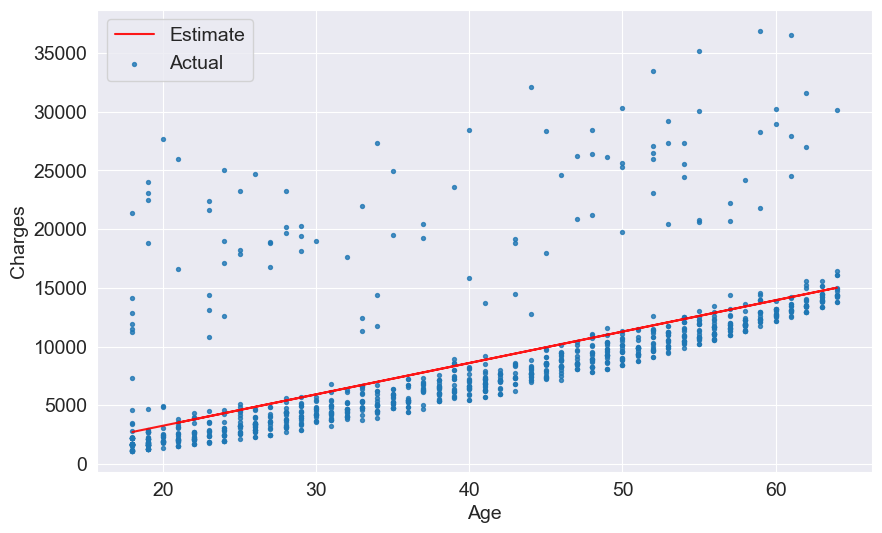

In [2183]:
try_parameters(model.coef_, model.intercept_)

Linear-regression using multiple features

In [2184]:
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
loss

4662.3128354612945

In [2185]:
non_smoker_df.charges.corr(non_smoker_df.bmi)
#bmi has very weak correlation with charges, especially non-smokers

0.08403654312833271

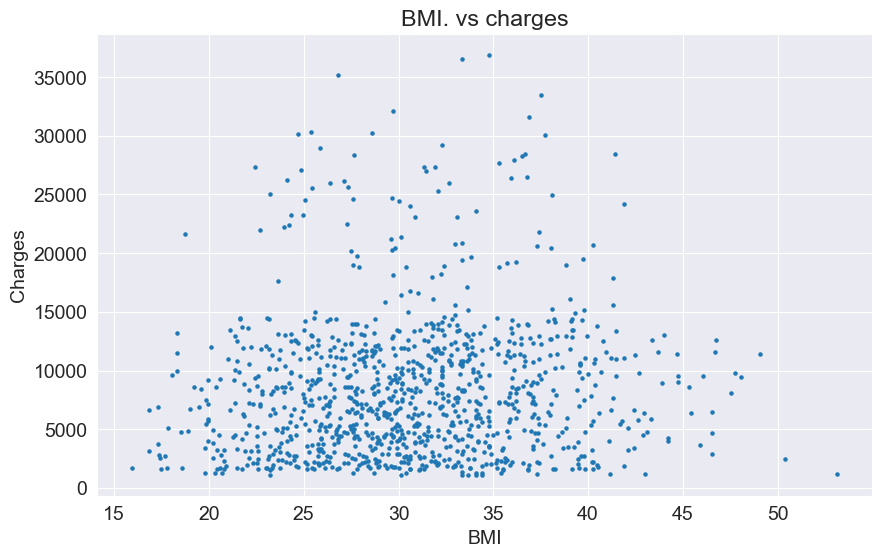

In [2186]:
plt.scatter(non_smoker_df['bmi'],
            non_smoker_df['charges'],
            s = 5)
plt.title('BMI. vs charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

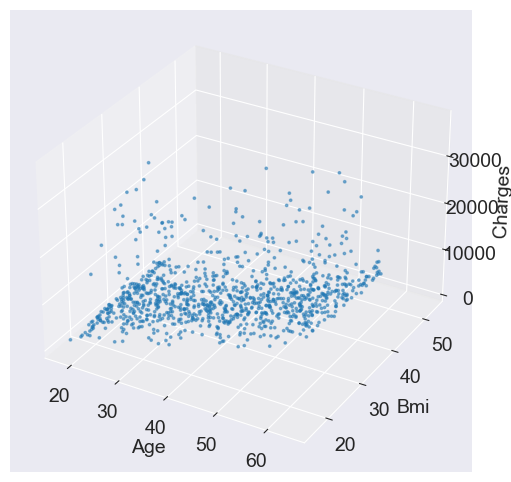

In [2187]:
#creating 3d plot with age, bmi and charges
fig = plt.figure()
ax = fig.add_subplot(111, 
                     projection = '3d')

ax.scatter(non_smoker_df['age'],
           non_smoker_df['bmi'],
           non_smoker_df['charges'],
           s = 3,
           alpha = 0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Bmi')
ax.set_zlabel('Charges')

plt.show()

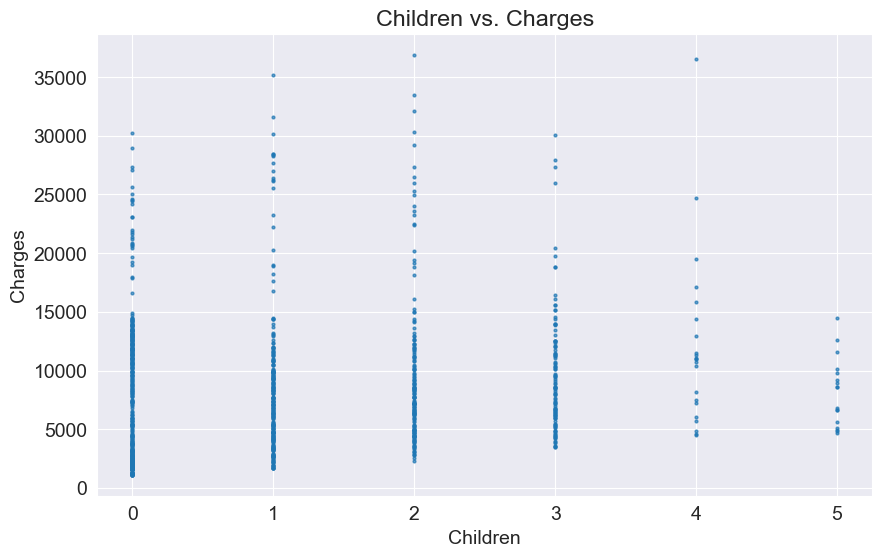

In [2188]:
plt.scatter(non_smoker_df['children'],
            non_smoker_df['charges'],
            alpha = 0.7,
            s = 4)

plt.title('Children vs. Charges')
plt.xlabel('Children')
plt.ylabel('Charges')

plt.show()

In [2189]:
inputs, targets = medical_df[['age','bmi','children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rmse(targets, predictions)

11355.317901125973

Categorical Features

<Axes: xlabel='smoker', ylabel='charges'>

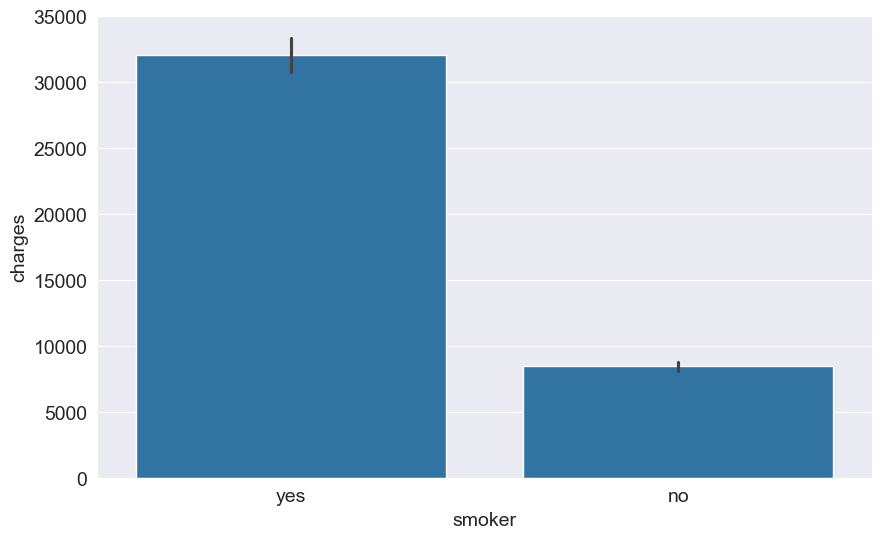

In [2190]:
medical_df1 = pd.read_csv('medical.csv')
sns.barplot(data = medical_df1,
            x = 'smoker',
            y = 'charges')

In [2191]:
smoker_codes = {'no': 0,
                'yes': 1
            }
medical_df1['smoker_code'] = medical_df1.smoker.map(smoker_codes)
medical_df1.charges.corr(medical_df1.smoker_code)

0.7872514304984778

In [2192]:
medical_df1

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0
